In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
## Downloading trip data and unzipping it
# !curl -O https://s3.amazonaws.com/tripdata/201809-citibike-tripdata.csv.zip
# !unzip 201809-citibike-tripdata.csv.zip -d $PUIDATA/

# Idea:
## Women take proportionally fewer trips with Citibike on weekend nights (Friday and Saturday after 8pm) than men do. 

# Null Hypothesis:
## Men take, proportionally, the same or more rides during weekdays and daytime on weekends than women. 

# _$H_0$_ : $\frac{W_{\mathrm{weekend\ night\ rides}}}{W_{\mathrm{total\ weekly\ rides}}} <= \frac{M_{\mathrm{weekend\ night\ rides}}}{M_{\mathrm{total\ weekly\ rides}}}$
# _$H_1$_ : $\frac{W_{\mathrm{weekend\ night\ rides}}}{W_{\mathrm{total\ weekly\ rides}}} > \frac{M_{\mathrm{weekend\ night\ rides}}}{M_{\mathrm{total\ weekly\ rides}}}$

## Let's use a significance level of  $\alpha=0.05$


In [2]:
# Read in the data to a pandas dataframe so we can run some EDA
df = pd.read_csv(os.getenv("PUIDATA")+"/201809-citibike-tripdata.csv")

In [3]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [4]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1635,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1
1,132,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0
2,3337,2018-09-01 00:00:20.6490,2018-09-01 00:55:58.5470,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1
3,436,2018-09-01 00:00:21.7460,2018-09-01 00:07:38.5830,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2
4,8457,2018-09-01 00:00:27.3150,2018-09-01 02:21:25.3080,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1


In [5]:
df['ride_start'] = pd.to_datetime(df['starttime'])
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis = 1, inplace=True)

In [6]:
## get the day of week, monday is 0 sunday is 6
df['dow'] = df.ride_start.dt.dayofweek

## make a dummy variable that will tell us if it's a weekend night trip or not
## friday is 4 and saturday is 5 in our dow (day of week) column
df['fri_sat'] = np.where((df['dow'] == 4) | (df['dow'] == 5), 1, 0)
df['wkndpm'] = np.where((df['fri_sat'] == 1) & (df.ride_start.dt.hour > 20), 1, 0)

In [7]:
df.head(5)
## Note about the gender field: 0 is unknown, 1 is male, 2 is female

,gender,ride_start,dow,fri_sat,wkndpm
0,1,2018-09-01 00:00:05.269,5,1,0
1,0,2018-09-01 00:00:11.281,5,1,0
2,1,2018-09-01 00:00:20.649,5,1,0
3,2,2018-09-01 00:00:21.746,5,1,0
4,1,2018-09-01 00:00:27.315,5,1,0


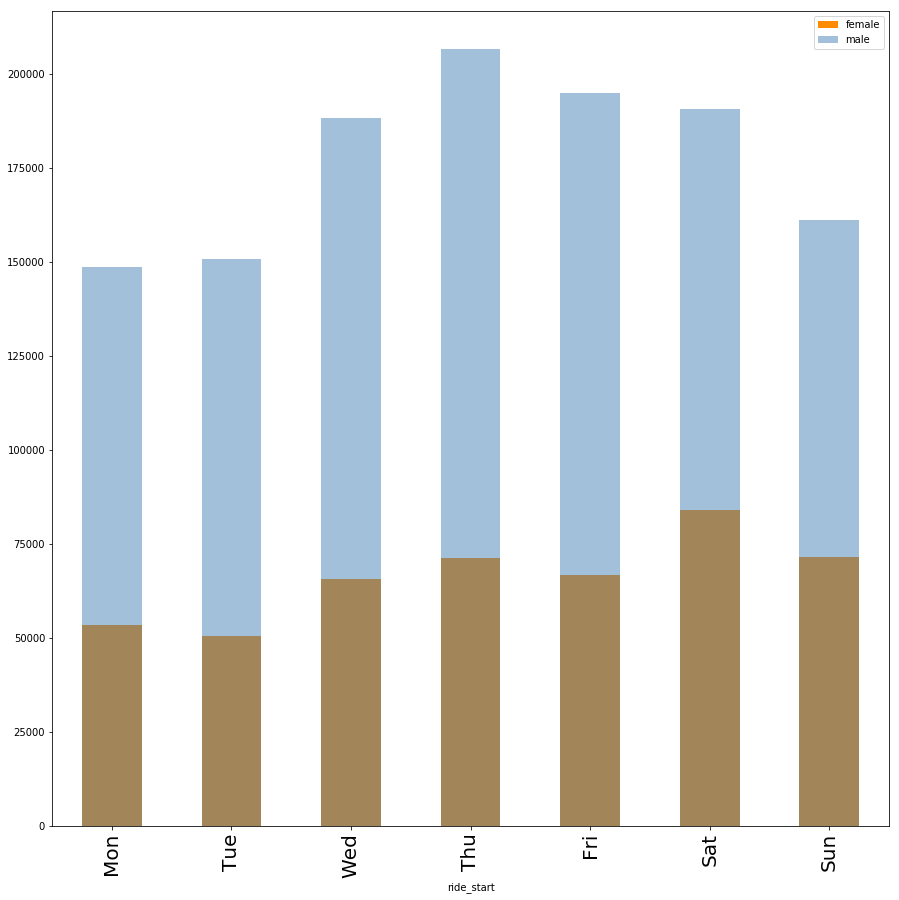

In [11]:
## Plot gender of rider by day

ig = pl.figure(figsize(15,15))

female_rides = 1
((df['ride_start'][df['gender'] == 2].groupby([df['ride_start'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='DarkOrange', 
                                                                                         label='female')

male_rides = 1
ax = ((df['ride_start'][df['gender'] == 1].groupby([df['ride_start'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 1: Gender distribution of Citibike Riders by Day of the Week in September 2018